#Eploratory Data Analysis-2

1. Data Exploration and Preprocessing

In [1]:
import pandas as pd
df=pd.read_csv("/content/adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

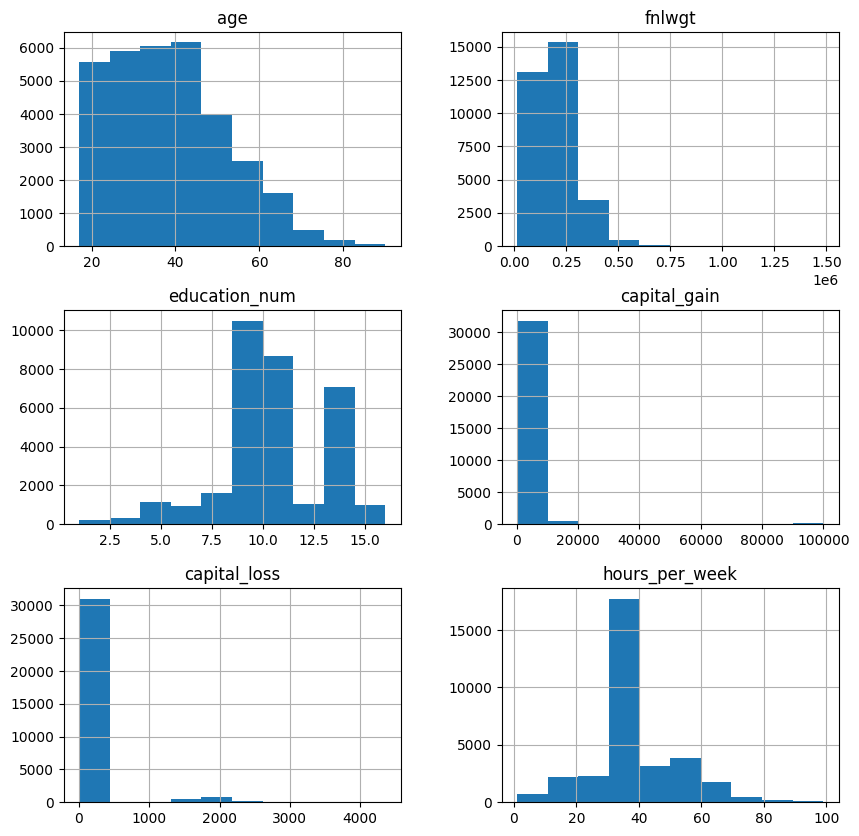

In [5]:
#histograms
df.hist(figsize=(10,10))

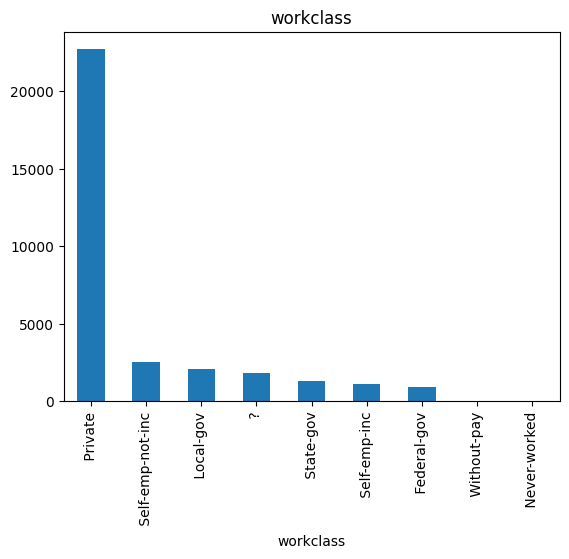

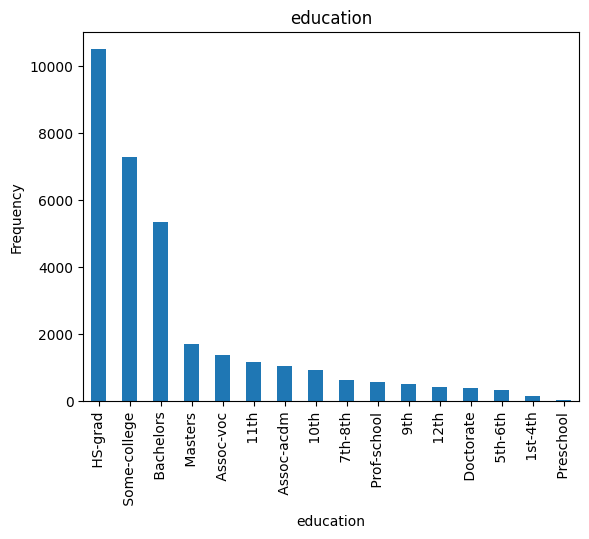

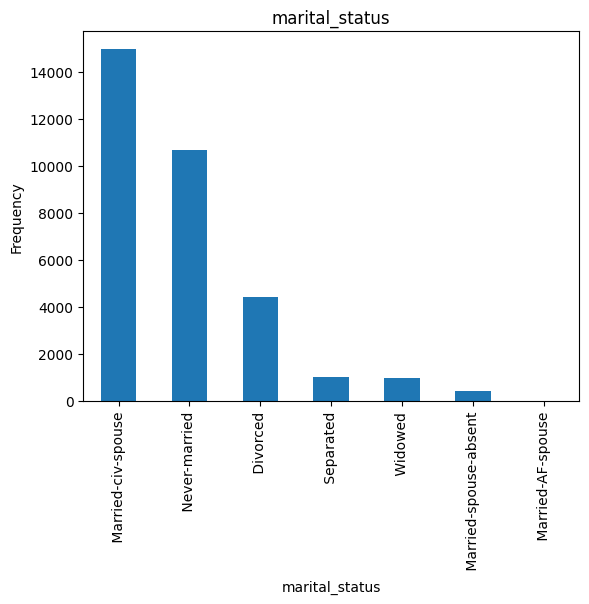

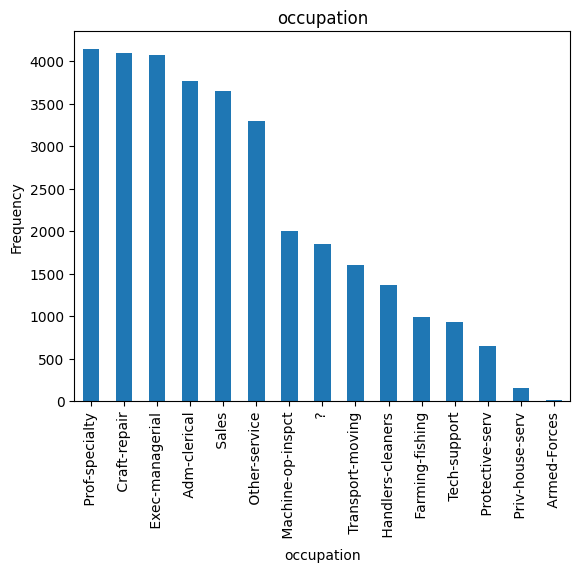

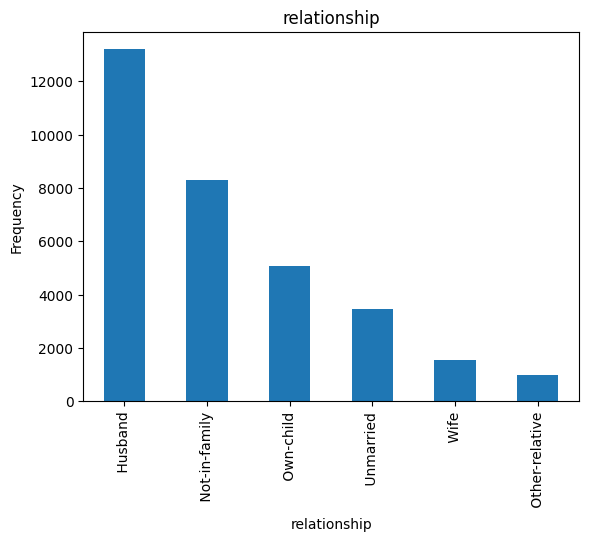

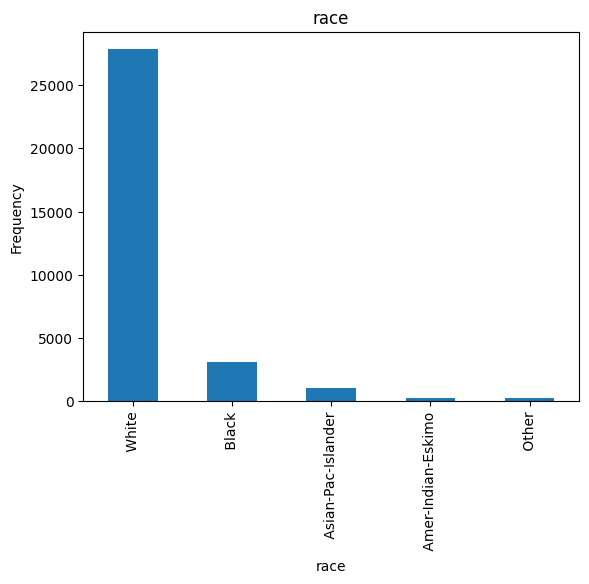

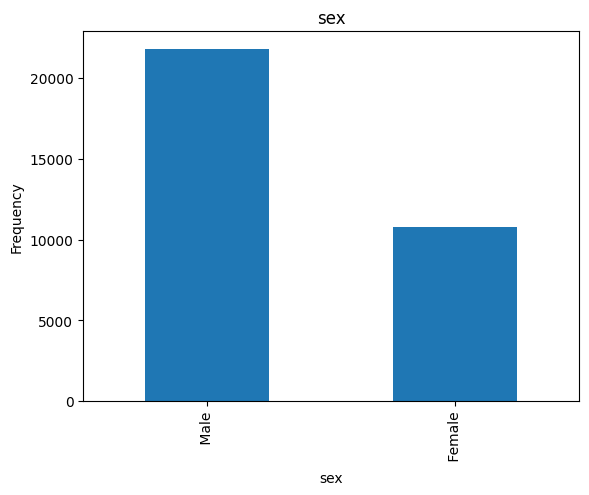

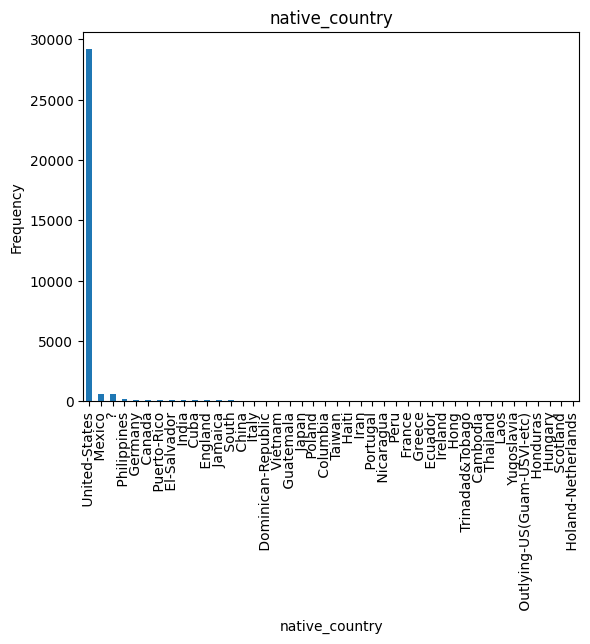

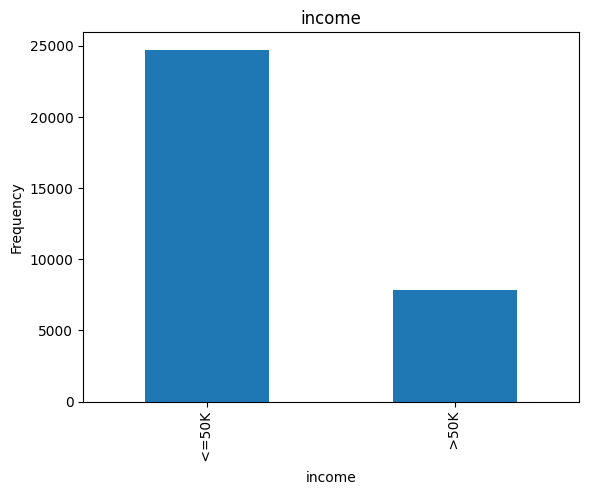

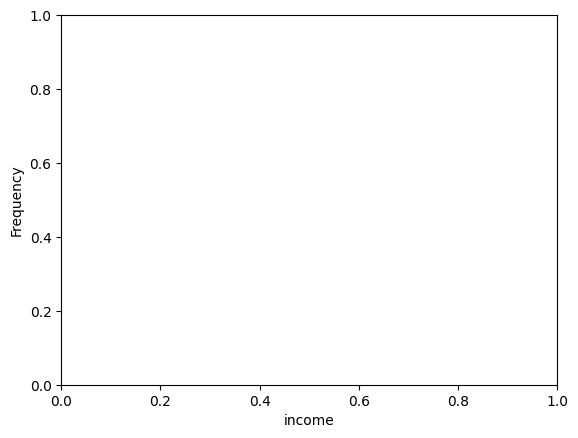

In [6]:
#bar graphs
import matplotlib.pyplot as plt
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()
    plt.xlabel(column)
    plt.ylabel('Frequency')

In [7]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [8]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ss=scaler.fit_transform(df.iloc[:, [0,2,4,10,11,12]])
ss=pd.DataFrame(ss)
ss.columns=df.columns[[0,2,4,10,11,12]]
ss

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [9]:
#min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
mm=scaler.fit_transform(df.iloc[:, [0,2,4,10,11,12]])
mm=pd.DataFrame(mm)
mm.columns=df.columns[[0,2,4,10,11,12]]
mm

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


2. Encoding Techniques

In [10]:
# One-Hot Encoding for categorical variables with less than 5 categories
categorical_columns = df.select_dtypes(include=['object']).columns
low_cardinality_cols = [col for col in categorical_columns if df[col].nunique() < 5]

df_encoded = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)
display(df_encoded.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,False,False


In [11]:
from sklearn.preprocessing import LabelEncoder

high_cardinality_cols = [col for col in categorical_columns if df[col].nunique() >= 5]

# Apply Label Encoding
for col in high_cardinality_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

display(df_encoded.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False


In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Ensure pandas is imported

#Label Encoding to high cardinality columns in df_encoded
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
high_cardinality_cols = [col for col in categorical_columns if df_encoded[col].nunique() >= 5]

for col in high_cardinality_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Concatenate the transformed numerical and encoded categorical features
# Ensure that ss and mm are DataFrames (they are based on previous code)
df_transformed = pd.concat([ss, mm, df_encoded], axis=1)

display(df_transformed.head())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age,fnlwgt,education_num,capital_gain,...,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.301370,0.044302,0.800000,0.02174,...,4,1,1,4,2174,0,40,39,True,False
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.452055,0.048238,0.800000,0.00000,...,2,4,0,4,0,0,13,39,True,False
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.287671,0.138113,0.533333,0.00000,...,0,6,1,4,0,0,40,39,True,False
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.493151,0.151068,0.400000,0.00000,...,2,6,0,2,0,0,40,39,True,False
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0.150685,0.221488,0.800000,0.00000,...,2,10,5,2,0,0,40,5,False,False


3. Feature Engineering

In [13]:
# Create Capital Difference feature
df_encoded['capital_difference'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

# Create Hours per Age Ratio feature
# Add a small constant to age to avoid division by zero in case of age 0 (although not present in this dataset based on describe output)
df_encoded['hours_per_age_ratio'] = df_encoded['hours_per_week'] / (df_encoded['age'] + 1e-6)

display(df_encoded[['capital_gain', 'capital_loss', 'capital_difference', 'hours_per_week', 'age', 'hours_per_age_ratio']].head())

,capital_gain,capital_loss,capital_difference,hours_per_week,age,hours_per_age_ratio
0,2174,0,2174,40,39,1.025641
1,0,0,0,13,50,0.260000
2,0,0,0,40,38,1.052632
3,0,0,0,40,53,0.754717
4,0,0,0,40,28,1.428571


<Axes: >

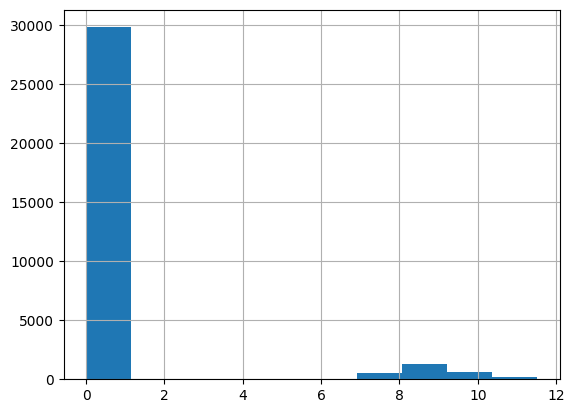

In [14]:
import numpy as np

# Apply log transformation to 'capital_gain' as it is highly skewed
# Add 1 to handle zero values before taking the log
df_encoded['capital_gain_log'] = np.log(df_encoded['capital_gain'] + 1)

# Display the histogram of the transformed feature to see the effect
df_encoded['capital_gain_log'].hist()

4. Feature Selection

In [15]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
# contamination='auto' lets the model decide the proportion of outliers
iso = IsolationForest(contamination='auto', random_state=42)

# Fit the model and predict outliers
outliers = iso.fit_predict(df_transformed)

# Filter the DataFrame to remove outliers
# Isolation Forest predicts -1 for outliers and 1 for inliers
df_cleaned = df_transformed[outliers == 1]

display(df_cleaned.head())
print(f"Original number of rows: {len(df_transformed)}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age,fnlwgt,education_num,capital_gain,...,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.301370,0.044302,0.800000,0.02174,...,4,1,1,4,2174,0,40,39,True,False
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.452055,0.048238,0.800000,0.00000,...,2,4,0,4,0,0,13,39,True,False
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.287671,0.138113,0.533333,0.00000,...,0,6,1,4,0,0,40,39,True,False
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.493151,0.151068,0.400000,0.00000,...,2,6,0,2,0,0,40,39,True,False
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0.150685,0.221488,0.800000,0.00000,...,2,10,5,2,0,0,40,5,False,False


Original number of rows: 32561
Number of rows after outlier removal: 29683


In [15]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=98fc655a7a600f5997b6e01cca3a3197961ba615bffc8eac6b9cb691e8b87e82
  Stored in directory: /root/.cache/pip/wheels/30/1c/06/b724ffb08ed69cd209743b44137306245ebbf025fd9acacf0c
  Created wheel for pandas: filename=pandas-1.5.3-cp312-cp312-linux_x86_64.whl size=41460886 sha256=3e493e2b2668109f31a493d890e78d5d7fbe98da10f2effe49e5b9ca9347149f
  Stored in directory: /root/.cache/pip/wheels/fb/83/18/8e7307aa1185c5498c5490e4d9c8a1732d9f1056e86c3491c6
Successfully built ppscore pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency 

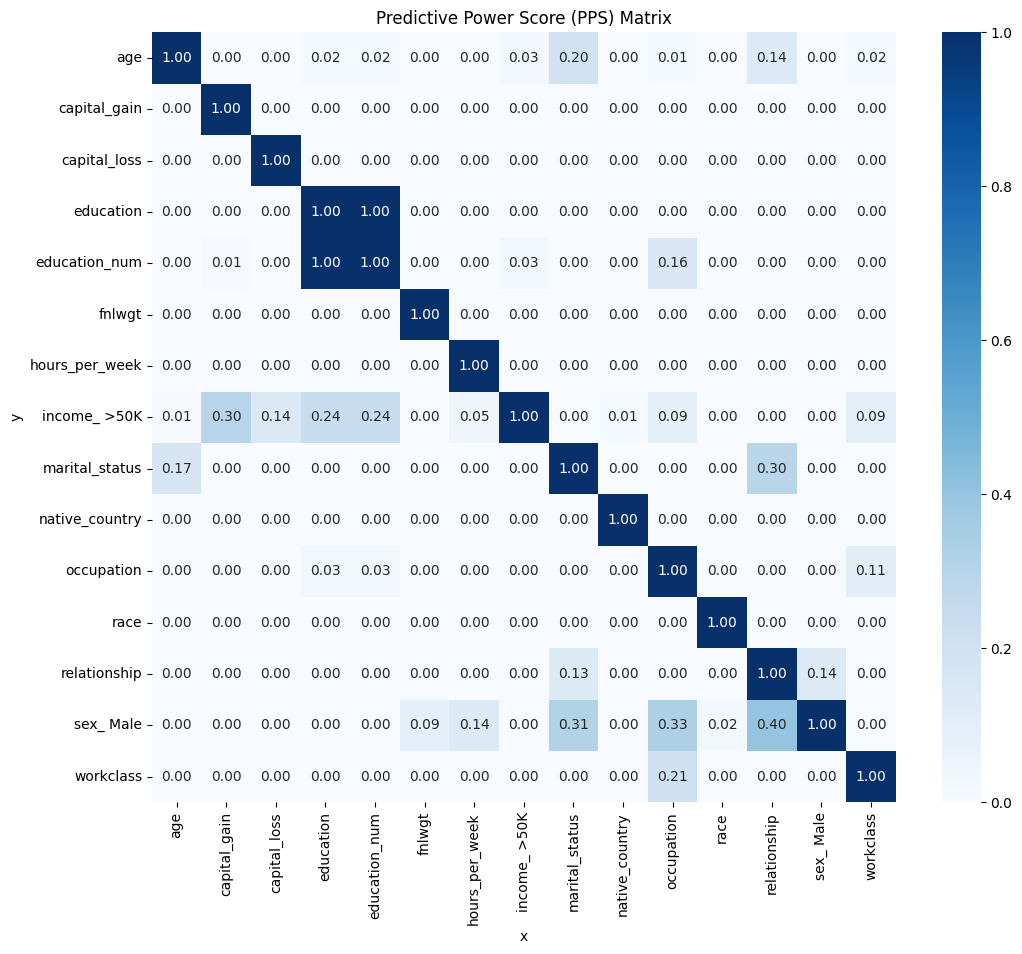

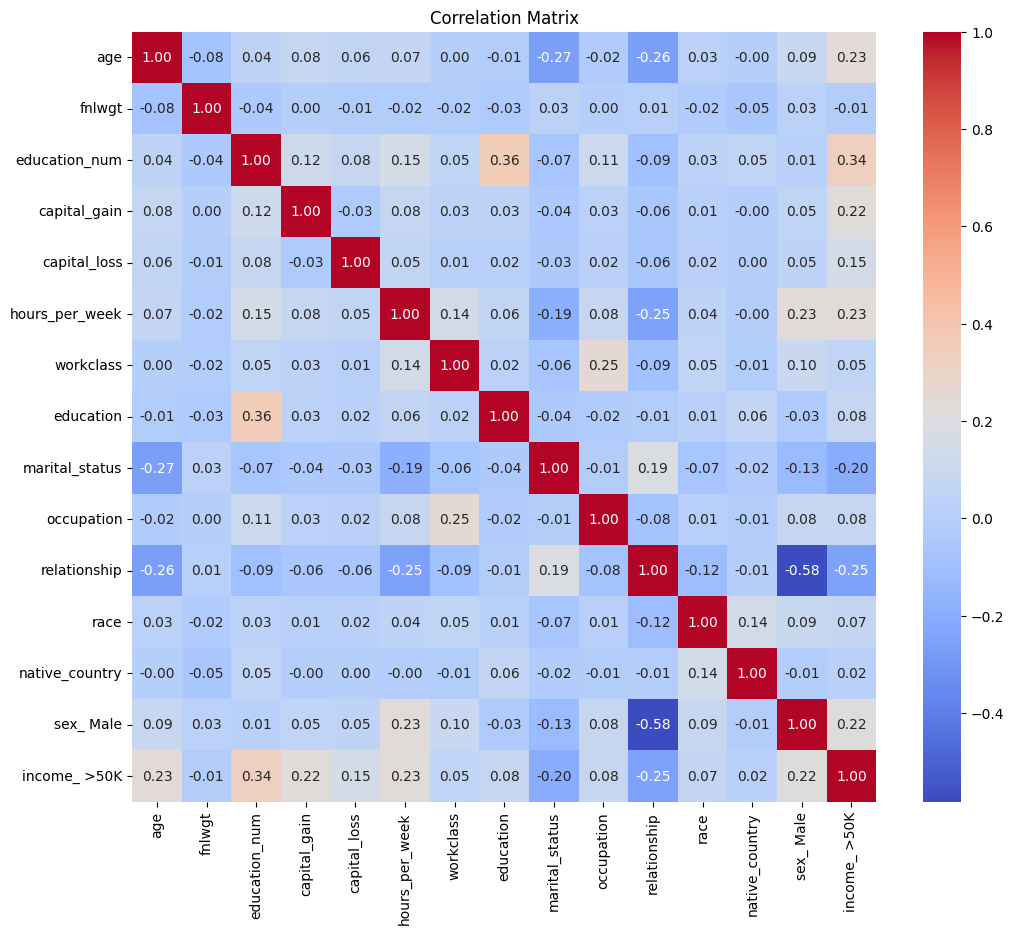


Discussion of PPS vs. Correlation:

Correlation measures linear relationships between numerical variables.
PPS measures the predictive power of one variable on another, including non-linear relationships and relationships between categorical and numerical variables.

Key differences observed:
- PPS scores are asymmetric (pps(x, y) is not necessarily equal to pps(y, x)).
- PPS can reveal relationships where correlation is zero (e.g., non-linear relationships).
- Correlation is only applicable to numerical features, while PPS can handle different data types.


In [17]:
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

# Drop duplicate 'age' columns before calculating PPS
# Keep one of the transformed 'age' columns (from ss or mm) and the encoded 'age' column.
df_cleaned = df_transformed.loc[:,~df_transformed.columns.duplicated()].copy()

# Calculate the PPS matrix
pps_matrix = pps.matrix(df_cleaned)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plot the PPS heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pps_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Predictive Power Score (PPS) Matrix')
plt.show()

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Discussion of findings
print("\nDiscussion of PPS vs. Correlation:\n")
print("Correlation measures linear relationships between numerical variables.")
print("PPS measures the predictive power of one variable on another, including non-linear relationships and relationships between categorical and numerical variables.")
print("\nKey differences observed:")
print("- PPS scores are asymmetric (pps(x, y) is not necessarily equal to pps(y, x)).")
print("- PPS can reveal relationships where correlation is zero (e.g., non-linear relationships).")
print("- Correlation is only applicable to numerical features, while PPS can handle different data types.")